<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



### Integrantes:

* Carignano, Hugo. 
* Diaz, Federico.
* Villafañe, Roxana Noelia. 

<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendisaje Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 12/09*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Supervisado

Esta entrega es una continuación del trabajo anterior, donde se agregan nuevos algoritmos para evaluar en nuestro dataSet. 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Utilizar la configuración del dataset empleada en el trabajo anterior, en lo que respecta al balanceo del dataset. 

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir las mas representativas.

##### Explorarción de algoritmos de clasificación: 
 1. Entrenar el modelo sin parámetros y tomarlo como baseline. Revisar documentación para identificar los parámetros correspondientes.

 2. Utilizar CV para encontrar los parámetros para encontrar el mejor modelo de cada uno de ellos. 
 
 3. Graficar la métrica elegida con respecto al cambio de los parámetros en los conjuntos 'test' y 'train'.

 4. Hacer una tabla para comparar los mejores modelos de cada algoritmo.
 
 5. Visualizar los resultados por medio de:
    * Matriz de Confusión
    * Reporte de Clasificación
    * Curvas ROC
 
Explorar los algoritmos:
 * Regresión Logistica 
 * NaiveBayes
 * SVM

Probar luego métodos de [ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble):
 * Random Forest
 * Boosting
 * Luego probar con los modelos mas sensillos, métodos de voting y ver si mejoran los resultados.
Pueden probar [VotingClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


Extra si les queda tiempo:
 * Redes neuronales, con las imágenes como datos de entrada. 

 
Automatizar lo mas posible el proceso. 

Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).



### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [1]:
#corroboramos la version ultima de sklearn
import sklearn
sklearn.__version__

'0.24.2'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_precision_recall_curve
from sklearn.tree import plot_tree, export_text
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_det_curve
from sklearn.metrics import precision_recall_curve

### Ingresamos los datos

In [5]:
train = pd.read_csv("https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_train_crop_features_labels.csv", index_col=0, low_memory=False)

In [6]:
test = pd.read_csv('https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_test_crop_features_labels.csv', index_col=0, low_memory=False )

In [7]:
#chequeamos que esten bien ingresados los datos
train.head()

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000001_single_box_0.jpg    640     360   csb   304   359   
1  Video1-frame-000002_single_box_0.jpg    640     360   csb   300   363   
2  Video1-frame-000003_single_box_0.jpg    640     360   csb   301   368   
3  Video1-frame-000005_single_box_0.jpg    640     360   csb   304   364   
4  Video1-frame-000006_single_box_0.jpg    640     360   csb   300   366   

   ymin  ymax    use videoname  ...      2038      2039      2040      2041  \
0    58   136  train    Video1  ...  0.240625  0.174334  0.082095  0.051256   
1    61   136  train    Video1  ...  0.518146  0.330701  0.123241  0.102351   
2    60   141  train    Video1  ...  0.505053  0.262259  0.195963  0.096156   
3    64   148  train    Video1  ...  0.427743  0.051373  0.061770  0.175729   
4    57   144  train    Video1  ...  0.615897  0.227388  0.171615  0.095271   

       2042      2043      2044      2045      2046      2047  
0  0.315918  0.332574  0.003393  0.009189  0.574400  0.002943  
1  0.385447  0.226580  0.119403  0.024265  0.584723  0.016324  
2  0.378540  0.123568  0.130680  0.034125  0.363607  0.022648  
3  0.314424  0.180715  0.015458  0.001125  0.441648  0.007727  
4  0.396625  0.229164  0.042033  0.015454  0.450313  0.105094  

[5 rows x 2063 columns]

In [8]:
#chequeamos que esten bien ingresados los datos
test.head()

filename  width  height clase  xmin  xmax  \
0  Video1-frame-000004_single_box_0.jpg    640     360   csb   301   364   
1  Video1-frame-000021_single_box_0.jpg    640     360   csb   302   372   
2  Video1-frame-000039_single_box_0.jpg    640     360   csb   302   370   
3  Video1-frame-000040_single_box_0.jpg    640     360   csb   304   366   
4  Video1-frame-000049_single_box_0.jpg    640     360   csb   301   370   

   ymin  ymax   use videoname  ...      2038      2039      2040      2041  \
0    67   142  test    Video1  ...  0.527056  0.206607  0.088397  0.151086   
1    58   150  test    Video1  ...  0.677232  0.260983  0.115730  0.066464   
2    73   151  test    Video1  ...  0.777344  0.406547  0.141575  0.180588   
3    61   147  test    Video1  ...  0.385662  0.076638  0.052307  0.051061   
4    73   144  test    Video1  ...  0.652445  0.121156  0.190035  0.263037   

       2042      2043      2044      2045      2046      2047  
0  0.440707  0.154175  0.034357  0.005899  0.499648  0.015035  
1  0.608533  0.131131  0.026713  0.041257  0.372580  0.057565  
2  0.353841  0.171803  0.067228  0.011203  0.631417  0.047634  
3  0.349400  0.375640  0.011560  0.000363  0.583134  0.020465  
4  0.288280  0.200618  0.011605  0.015202  0.616542  0.032798  

[5 rows x 2063 columns]

In [9]:
print(train.shape)
print(test.shape)

(1913, 2063)
(495, 2063)


#### Seleccionamos las variables de trabajo

In [10]:
#seleccionamos las columnas con las que vamos a trabajar
X_train = train[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [11]:
y_train = train[['clase']]

In [12]:
X_test = test[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [13]:
y_test = test[['clase']]

In [14]:
le = preprocessing.LabelEncoder()
le.fit(y_train) #aca vamos a codificar los labels categoricos

LabelEncoder()

In [15]:
list(le.classes_) 

['ccb', 'csb']

In [16]:
y_train_enc = le.transform(y_train)  #aca vamos a transformar los labels categoricos

In [17]:
y_train_LE = pd.DataFrame(y_train_enc) #transformamos a pandas dataframe

In [18]:
#aplicamos las transformaciones en y_test tambien
le.fit(y_test)
y_test_enc = le.transform(y_test)
y_test_LE = pd.DataFrame(y_test_enc)

Como podemos ver, con este baseline, se overfittean los resultados de TRAIN, dando como diferencia un 4 % entre training y testing. 

https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv




## Algoritmo de SVM 


Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra.

Como en la mayoría de los métodos de clasificación supervisada, los datos de entrada (los puntos) son vistos como un vector p-dimensional (una lista ordenada de p números).

La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.

En ese concepto de "separación óptima" es donde reside la característica fundamental de las SVM: este tipo de algoritmos buscan el hiperplano que tenga la máxima distancia (margen) con los puntos que estén más cerca de él mismo. Por eso también a veces se les conoce a las SVM como clasificadores de margen máximo. De esta forma, los puntos del vector que son etiquetados con una categoría estarán a un lado del hiperplano y los casos que se encuentren en la otra categoría estarán al otro lado.

Los algoritmos SVM pertenecen a la familia de los clasificadores lineales. También pueden ser considerados un caso especial de la regularización de Tikhonov.

En la literatura de las SVM, se llama atributo a la variable predictora y característica a un atributo transformado que es usado para definir el hiperplano. La elección de la representación más adecuada del universo estudiado, se realiza mediante un proceso denominado selección de características.

Al vector formado por los puntos más cercanos al hiperplano se le llama vector de soporte.

Los modelos basados en SVM están estrechamente relacionados con las redes neuronales. Usando una función kernel, resultan un método de entrenamiento alternativo para clasificadores polinomiales, funciones de base radial y perceptrón multicapa.



## SVM Baseline

Documentación en scikit-learn: https://scikit-learn.org/stable/modules/svm.html

### Solo Numéricas

In [19]:
%%time
pipeline = Pipeline([("scaler", StandardScaler()),
                     ("svc", SVC(random_state=42))])
pipeline.fit(X_train,y_train_LE)


Wall time: 63.8 ms


Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

In [20]:
pipeline #veamos que contiene el pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

Como se puede observar en la siguiente Figura, solo se han escalado los datos y usado el modelo por defecto sin tunning de hiperparametros. 

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1427
           1       0.90      0.82      0.86       486

    accuracy                           0.93      1913
   macro avg       0.92      0.90      0.91      1913
weighted avg       0.93      0.93      0.93      1913



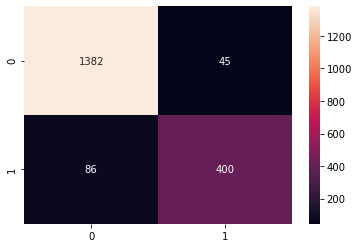

In [21]:
y_pred_train = pipeline.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       382
           1       0.80      0.75      0.78       113

    accuracy                           0.90       495
   macro avg       0.86      0.85      0.86       495
weighted avg       0.90      0.90      0.90       495



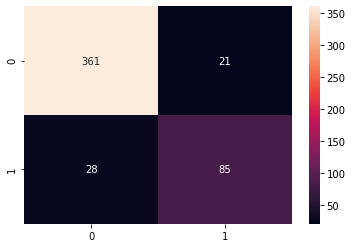

In [22]:
y_pred = pipeline.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

### Con las 10 mejores de la **ResNet**

In [23]:
train_numeric = train._get_numeric_data()
test_numeric = test._get_numeric_data()


In [24]:
baseline_10_resnet = Pipeline([("chi2", SelectKBest(chi2, k=10)),
                     ("scaler", StandardScaler()),
                     ("svc", SVC(random_state=42))])


In [25]:
baseline_10_resnet.fit(train_numeric, y_train_LE)


Pipeline(steps=[('chi2',
                 SelectKBest(score_func=<function chi2 at 0x0000022FFD147488>)),
                ('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

In [26]:
baseline_10_resnet #veamos que contiene el pipeline

Pipeline(steps=[('chi2',
                 SelectKBest(score_func=<function chi2 at 0x0000022FFD147488>)),
                ('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1427
           1       0.98      0.92      0.95       486

    accuracy                           0.97      1913
   macro avg       0.98      0.96      0.97      1913
weighted avg       0.98      0.97      0.97      1913



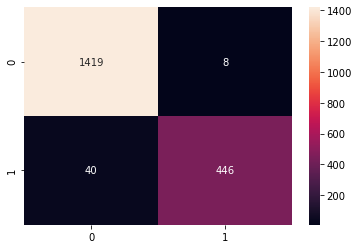

In [27]:
y_pred_train = baseline_10_resnet.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

In [28]:
y_pred = baseline_10_resnet.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       382
           1       0.96      0.91      0.94       113

    accuracy                           0.97       495
   macro avg       0.97      0.95      0.96       495
weighted avg       0.97      0.97      0.97       495



#### Feature Importance

## Curva ROC y PR

In [29]:
rf_base = plot_roc_curve(pipeline, X_test, y_test_LE) 
rf_base10 = plot_roc_curve(baseline_10_resnet, test_numeric, y_test_LE) 
print('Curva ROC para Random Forest Classifier \n')

Curva ROC para Random Forest Classifier 



Curva PR para SVM Classifier 



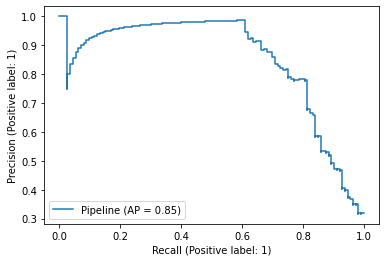

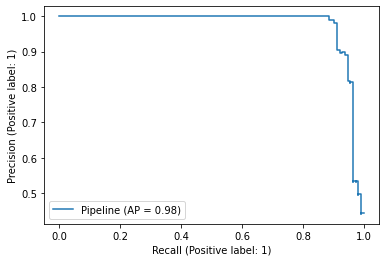

In [30]:
rf_base_pr = plot_precision_recall_curve(pipeline, X_test, y_test_LE)
rf_base_pr_10 = plot_precision_recall_curve(baseline_10_resnet, test_numeric, y_test_LE)
print('Curva PR para SVM Classifier \n')

## SVM con Tunning de Hiperparámetros

### GridSearchCV 

En esta instancia armamos un Pipeline con los pasos a emplear, solo se estandarizaron con la función StandarScaler() disponible en scikit-learn y se empleo como método de clasificación SVM, en el cual se seteo la semilla para reproducibilidad. Mas información en https://scikit-learn.org/stable/modules/svm.html 

Trabajar con Pipeline nos permite trabajar de manera ordenada en cuanto a los pasos/transformaciones que vamos a emplear en un dataset. Más información en la documentación: 
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html 

Mediante params_ especificamos los parametros a tunear con SVM, y realizamos una validación cruzada de 3 folds. 

## Con solo las numericas


In [31]:
%%time
pipeline = Pipeline([("scaler", StandardScaler()),
                     ("svc", SVC(random_state=42))])

params = {"svc__C": [1, 2, 3, 5],
          "svc__degree": [2, 3, 5, 6],
          "svc__decision_function_shape": ["ovo", "ovr"],
          "svc__kernel": ["linear", "poly", "rbf"]}
kf = KFold(n_splits=3, shuffle=True, random_state=4)
# initialize
grid_pipeline = GridSearchCV(pipeline,params,n_jobs=-1, verbose=1, cv=kf, scoring='accuracy', refit=True, return_train_score=True)
# fit
grid_pipeline.fit(X_train,y_train)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Wall time: 7.8 s


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3, 5],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [2, 3, 5, 6],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [32]:
grid_pipeline #aca podemos ver el pipeline

GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3, 5],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [2, 3, 5, 6],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
grid_pipeline.best_params_

{'svc__C': 5,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__kernel': 'rbf'}

In [34]:
results = grid_pipeline.cv_results_
df_grid = pd.DataFrame(results)
df_grid.head()

df_grid[['param_svc__C', 'param_svc__decision_function_shape', 'param_svc__degree', 'param_svc__kernel', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_svc__C param_svc__decision_function_shape param_svc__degree  \
95            5                                ovr                 6   
92            5                                ovr                 5   
89            5                                ovr                 3   
86            5                                ovr                 2   
83            5                                ovo                 6   
..          ...                                ...               ...   
49            3                                ovo                 2   
73            5                                ovo                 2   
85            5                                ovr                 2   
1             1                                ovo                 2   
13            1                                ovr                 2   

   param_svc__kernel  mean_test_score  std_test_score  rank_test_score  
95               rbf         0.938313        0.006482                1  
92               rbf         0.938313        0.006482                1  
89               rbf         0.938313        0.006482                1  
86               rbf         0.938313        0.006482                1  
83               rbf         0.938313        0.006482                1  
..               ...              ...             ...              ...  
49              poly         0.798752        0.012327               91  
73              poly         0.798228        0.012544               93  
85              poly         0.798228        0.012544               93  
1               poly         0.794571        0.010805               95  
13              poly         0.794571        0.010805               95  

[96 rows x 7 columns]

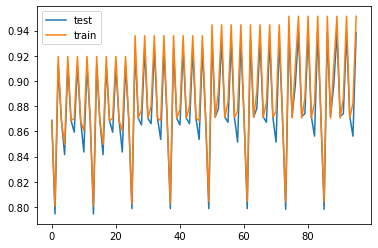

In [35]:
test_scores = grid_pipeline.cv_results_['mean_test_score']
train_scores = grid_pipeline.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


Vamos a plotear como varian los hiperparámetros en la búsqueda en grilla:

Fuente del código:
https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv




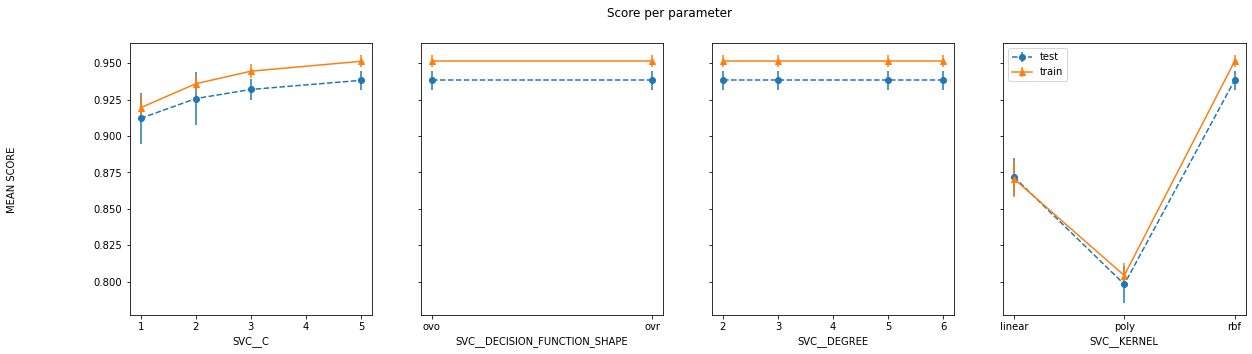

In [36]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
## Results from grid search
results = grid_pipeline.cv_results_
means_test = results['mean_test_score']
stds_test = results['std_test_score']
means_train = results['mean_train_score']
stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
masks=[]
masks_names= list(grid_pipeline.best_params_.keys())
for p_k, p_v in grid_pipeline.best_params_.items():
  masks.append(list(results['param_'+p_k].data==p_v))

params=grid_pipeline.param_grid

## Ploting results
fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
fig.suptitle('Score per parameter')
fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}
for i, p in enumerate(masks_names):
  m = np.stack(masks[:i] + masks[i+1:])
  pram_preformace_in_best
  best_parms_mask = m.all(axis=0)
  best_index = np.where(best_parms_mask)[0]
  x = np.array(params[p])
  y_1 = np.array(means_test[best_index])
  e_1 = np.array(stds_test[best_index])
  y_2 = np.array(means_train[best_index])
  e_2 = np.array(stds_train[best_index])
  ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
  ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
  ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()



**Performance en train y test**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

         ccb       0.96      0.98      0.97      1427
         csb       0.93      0.89      0.91       486

    accuracy                           0.96      1913
   macro avg       0.95      0.93      0.94      1913
weighted avg       0.95      0.96      0.95      1913



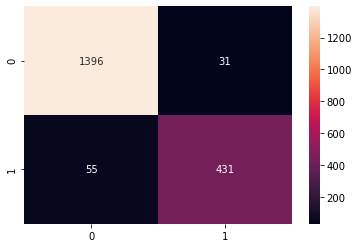

In [37]:
y_pred_train = grid_pipeline.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

In [38]:
y_pred = grid_pipeline.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

         ccb       0.94      0.96      0.95       382
         csb       0.84      0.81      0.82       113

    accuracy                           0.92       495
   macro avg       0.89      0.88      0.89       495
weighted avg       0.92      0.92      0.92       495



Como podemos ver la diferencia entre TRAIN (95%) y TEST (89%) existe un 6%. Veamos si solo empleando las mejores variables de la ResNet podemos achicar esa distancia. 

## Con las mejores variables de la ResNet10 haciendo selección de variables

Acá vamos a incluir todas las variables pero haciendo una seleccion dentro del Pipeline del modelo, para automatizar esa seleccion mediante chi cuadrado. 




In [39]:
train_numeric = train._get_numeric_data()
train_numeric

width  height  xmin  xmax  ymin  ymax  bb_width  bb_height        ch_R  \
0       640     360   304   359    58   136        55         78  191.840561   
1       640     360   300   363    61   136        63         75  183.752380   
2       640     360   301   368    60   141        67         81  175.958160   
3       640     360   304   364    64   148        60         84  187.911713   
4       640     360   300   366    57   144        66         87  173.947571   
...     ...     ...   ...   ...   ...   ...       ...        ...         ...   
1908   1280     720  1168  1280    41   250       112        209   92.318436   
1909   1280     720  1047  1231    72   311       184        239   89.923820   
1910   1280     720   974  1151   118   348       177        230   98.103539   
1911   1280     720   902  1074   106   383       172        277   97.310684   
1912   1280     720   771   939   123   397       168        274  105.734138   

            ch_G  ...      2038      2039      2040      2041      2042  \
0     153.567825  ...  0.240625  0.174334  0.082095  0.051256  0.315918   
1     146.789627  ...  0.518146  0.330701  0.123241  0.102351  0.385447   
2     141.141510  ...  0.505053  0.262259  0.195963  0.096156  0.378540   
3     150.097229  ...  0.427743  0.051373  0.061770  0.175729  0.314424   
4     139.453323  ...  0.615897  0.227388  0.171615  0.095271  0.396625   
...          ...  ...       ...       ...       ...       ...       ...   
1908   89.827538  ...  0.182259  0.026552  0.692655  0.517668  0.325972   
1909   82.779854  ...  0.205030  0.199259  0.414296  0.557889  0.486399   
1910   92.070747  ...  0.265758  0.024944  0.525602  0.674632  0.885417   
1911   88.274559  ...  0.372750  0.020123  0.486447  0.562567  0.553501   
1912   94.655632  ...  0.451980  0.136938  0.171661  0.526640  0.681594   

          2043      2044      2045      2046      2047  
0     0.332574  0.003393  0.009189  0.574400  0.002943  
1     0.226580  0.119403  0.024265  0.584723  0.016324  
2     0.123568  0.130680  0.034125  0.363607  0.022648  
3     0.180715  0.015458  0.001125  0.441648  0.007727  
4     0.229164  0.042033  0.015454  0.450313  0.105094  
...        ...       ...       ...       ...       ...  
1908  0.295883  0.278505  0.189561  0.501087  0.132643  
1909  0.085526  0.205289  0.409898  0.912477  0.043854  
1910  0.041088  0.162134  0.758789  0.849687  0.150298  
1911  0.058438  0.440513  0.482803  0.638911  0.262574  
1912  0.132192  0.207461  0.376891  0.677032  0.001313  

[1913 rows x 2059 columns]

In [40]:
test_numeric = test._get_numeric_data()
test_numeric

width  height  xmin  xmax  ymin  ymax  bb_width  bb_height        ch_R  \
0      640     360   301   364    67   142        63         75  186.534821   
1      640     360   302   372    58   150        70         92  167.621277   
2      640     360   302   370    73   151        68         78  173.094269   
3      640     360   304   366    61   147        62         86  169.174225   
4      640     360   301   370    73   144        69         71  178.161057   
..     ...     ...   ...   ...   ...   ...       ...        ...         ...   
490   1280     720   781   856   123   218        75         95  122.217690   
491   1280     720   634   825   184   446       191        262  139.187546   
492   1280     720   635   838   213   453       203        240  131.826675   
493   1280     720   635   830   213   445       195        232  134.150284   
494   1280     720   408   643   146   488       235        342  131.678009   

           ch_G  ...      2038      2039      2040      2041      2042  \
0    149.401276  ...  0.527056  0.206607  0.088397  0.151086  0.440707   
1    133.989441  ...  0.677232  0.260983  0.115730  0.066464  0.608533   
2    136.082397  ...  0.777344  0.406547  0.141575  0.180588  0.353841   
3    133.446930  ...  0.385662  0.076638  0.052307  0.051061  0.349400   
4    141.876297  ...  0.652445  0.121156  0.190035  0.263037  0.288280   
..          ...  ...       ...       ...       ...       ...       ...   
490  116.598877  ...  0.407592  1.306759  0.129363  0.351468  1.009017   
491  143.241516  ...  0.718371  0.536893  0.295574  0.899710  0.622583   
492  137.758987  ...  1.054097  0.526033  0.240182  0.694108  0.640038   
493  140.153351  ...  0.817749  0.699484  0.108975  1.006423  0.496087   
494  122.339935  ...  0.420739  0.100915  0.115223  0.639498  0.452234   

         2043      2044      2045      2046      2047  
0    0.154175  0.034357  0.005899  0.499648  0.015035  
1    0.131131  0.026713  0.041257  0.372580  0.057565  
2    0.171803  0.067228  0.011203  0.631417  0.047634  
3    0.375640  0.011560  0.000363  0.583134  0.020465  
4    0.200618  0.011605  0.015202  0.616542  0.032798  
..        ...       ...       ...       ...       ...  
490  0.003267  0.106780  0.134364  0.511100  0.039986  
491  0.099003  0.150524  0.533963  0.263250  0.056921  
492  0.193735  0.162843  0.578889  0.408409  0.063361  
493  0.129221  0.174382  0.584406  0.256982  0.021594  
494  0.070030  0.222247  0.524002  1.120981  0.179200  

[495 rows x 2059 columns]

In [41]:
%%time 
#nos dira la cantidad de tiempo empleado
pipeline = Pipeline([("chi2", SelectKBest(chi2, k=10)),
                     ("scaler", StandardScaler()),
                     ("svc", SVC(random_state=42))])

#hiperparametros a optimizar
params = {"svc__C": [1, 2, 3, 5],
          "svc__degree": [2, 3, 5, 6],
          "svc__decision_function_shape": ["ovo", "ovr"],
          "svc__kernel": ["linear", "poly", "rbf"]}
kf = KFold(n_splits=3, shuffle=True, random_state=4)
# initialize
grid_pipeline_10 = GridSearchCV(pipeline,params,n_jobs=-1, verbose=1, cv=kf, scoring='accuracy', refit=True, return_train_score=True)
# fit
grid_pipeline_10.fit(train_numeric,y_train_LE)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Wall time: 8.79 s


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('chi2',
                                        SelectKBest(score_func=<function chi2 at 0x0000022FFD147488>)),
                                       ('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3, 5],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [2, 3, 5, 6],
                         'svc__kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [42]:
grid_pipeline_10.best_params_

{'svc__C': 5,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__kernel': 'rbf'}

In [43]:
results = grid_pipeline_10.cv_results_
df_grid = pd.DataFrame(results)
df_grid.head()

df_grid[['param_svc__C', 'param_svc__decision_function_shape', 'param_svc__degree', 'param_svc__kernel', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_svc__C param_svc__decision_function_shape param_svc__degree  \
95            5                                ovr                 6   
92            5                                ovr                 5   
89            5                                ovr                 3   
86            5                                ovr                 2   
83            5                                ovo                 6   
..          ...                                ...               ...   
73            5                                ovo                 2   
25            2                                ovo                 2   
37            2                                ovr                 2   
13            1                                ovr                 2   
1             1                                ovo                 2   

   param_svc__kernel  mean_test_score  std_test_score  rank_test_score  
95               rbf         0.977527        0.008704                1  
92               rbf         0.977527        0.008704                1  
89               rbf         0.977527        0.008704                1  
86               rbf         0.977527        0.008704                1  
83               rbf         0.977527        0.008704                1  
..               ...              ...             ...              ...  
73              poly         0.930998        0.019197               91  
25              poly         0.928909        0.021268               93  
37              poly         0.928909        0.021268               93  
13              poly         0.921594        0.027674               95  
1               poly         0.921594        0.027674               95  

[96 rows x 7 columns]

#### Variación de scores a lo largo de la validación cruzada 

Fuente del código: https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv

In [44]:
test_scores = grid_pipeline_10.cv_results_['mean_test_score']
train_scores = grid_pipeline_10.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()


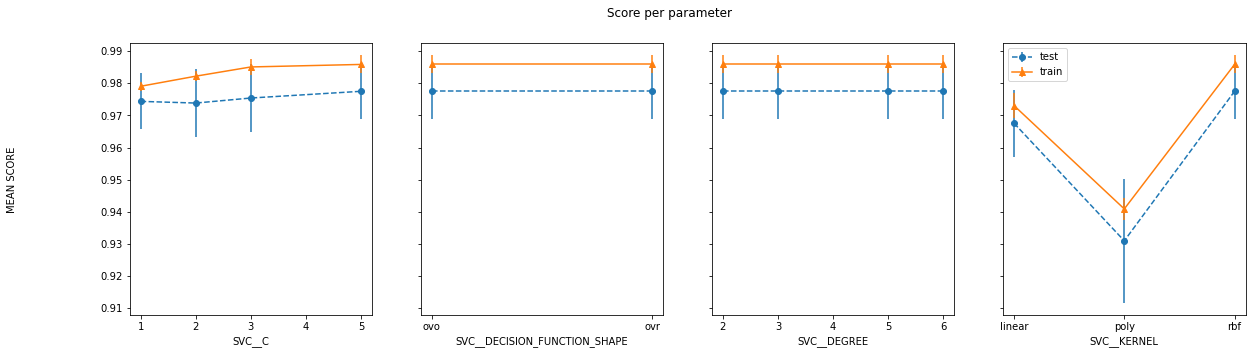

In [45]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
## Results from grid search
results = grid_pipeline_10.cv_results_
means_test = results['mean_test_score']
stds_test = results['std_test_score']
means_train = results['mean_train_score']
stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
masks=[]
masks_names= list(grid_pipeline_10.best_params_.keys())
for p_k, p_v in grid_pipeline_10.best_params_.items():
  masks.append(list(results['param_'+p_k].data==p_v))

params=grid_pipeline_10.param_grid

## Ploting results
fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
fig.suptitle('Score per parameter')
fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
pram_preformace_in_best = {}
for i, p in enumerate(masks_names):
  m = np.stack(masks[:i] + masks[i+1:])
  pram_preformace_in_best
  best_parms_mask = m.all(axis=0)
  best_index = np.where(best_parms_mask)[0]
  x = np.array(params[p])
  y_1 = np.array(means_test[best_index])
  e_1 = np.array(stds_test[best_index])
  y_2 = np.array(means_train[best_index])
  e_2 = np.array(stds_train[best_index])
  ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
  ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
  ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()


**Performance en TRAIN y TEST**

In [46]:
y_pred_train = grid_pipeline_10.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1427
           1       0.99      0.95      0.97       486

    accuracy                           0.98      1913
   macro avg       0.99      0.97      0.98      1913
weighted avg       0.98      0.98      0.98      1913



Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       382
           1       0.93      0.91      0.92       113

    accuracy                           0.96       495
   macro avg       0.95      0.95      0.95       495
weighted avg       0.96      0.96      0.96       495



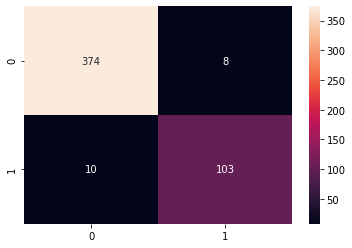

In [47]:
y_pred = grid_pipeline_10.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred))

## Conclusiones

Mediante el algoritmo de SVC() disponible en el paquete de sklearn.svm (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) se realizó una clasificación de las muestras con/sin barbijo. 
La optimización de hiperparámetros se realizó mediante una librería scikit-optimize que nos permite realizar optimización bayesiana. 

Con o sin tunning de hiperparámetros se logró un resultado similar en TRAIN y TEST. 

Concluimos que el dataset es simple para resolver las clases (con/sin barbijo) lo que nos permite valores altos de métricas. 